In [1]:
'''
This file is for Exploratory Data Analysis
@ Author: Shuyi Wang
@ Date: 2017/3/18
'''
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
sns.set(style="white", color_codes=True)

%matplotlib inline

In [2]:
path = 'C:\Users\shuyi\Documents\StudyResource\Kaggle\\'
train_file = "step2.csv"
# Read the training data
train_data = pd.read_csv(path + train_file)

print("number of rows:", train_data.shape[0])
print("number of columns:", train_data.shape[1])
train_data[1:10]

('number of rows:', 647054)
('number of columns:', 20)


,Unnamed: 0,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Count,Count_Null,ScanCount_Neg,FinelineNumber_Missing,N_Fineline,N_Upc,N_Dep,Min_Count,Max_Count,Mean_Count,Upc_full,company
1,1,30,7,0,605388159800,1,62,8931.0,1,0.0,0.0,0.0,2,2,2,1,1,1.0,605388159800,605388
2,2,30,7,0,74108110990,1,50,4504.0,1,0.0,0.0,0.0,2,2,2,1,1,1.0,741081109908,741081
3,3,26,8,0,22384035100,2,49,3565.0,2,0.0,1.0,1.0,17,21,7,1,18,4.0,223840351006,223840
4,4,26,8,0,20066137440,2,49,1017.0,2,0.0,1.0,1.0,17,21,7,1,18,4.0,200661374407,200661
5,5,26,8,0,20066187830,2,49,1017.0,2,0.0,1.0,1.0,17,21,7,1,18,4.0,200661878301,200661
6,6,26,8,0,20066137430,1,49,1017.0,1,0.0,1.0,1.0,17,21,7,1,18,4.0,200661374308,200661
7,7,26,8,0,70048027370,1,49,2802.0,1,0.0,1.0,1.0,17,21,7,1,18,4.0,700480273702,700480
8,8,26,8,0,22384953180,1,49,4501.0,1,0.0,1.0,1.0,17,21,7,1,18,4.0,223849531805,223849
9,9,26,8,0,22384002000,-1,49,3565.0,0,0.0,1.0,1.0,17,21,7,1,18,4.0,223840020001,223840


1.Feature Selection: Feature Selection 最实用的方法也就是看 Random Forest 训练完以后得到的 Feature Importance 了。

In [3]:
# initial random forest tree for variable selection
train_data.drop('Unnamed: 0', 1, inplace = True)
clf = RandomForestClassifier(n_jobs=2)
features = [ f for f in train_data.columns if f != 'TripType' ]
y = train_data['TripType']
# y, _ = pd.factorize(train_data['TripType'])
clf.fit(train_data[features], y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature ranking:
1. feature 0 (0.124356)
2. feature 11 (0.109684)
3. feature 4 (0.082663)
4. feature 2 (0.079965)
5. feature 5 (0.077523)
6. feature 10 (0.072318)
7. feature 1 (0.064707)
8. feature 15 (0.053032)
9. feature 20 (0.050440)
10. feature 16 (0.047699)
11. feature 18 (0.045063)
12. feature 17 (0.041520)
13. feature 19 (0.040616)
14. feature 12 (0.040527)
15. feature 14 (0.029509)
16. feature 8 (0.010230)
17. feature 13 (0.009679)
18. feature 6 (0.007035)
19. feature 9 (0.005565)
20. feature 3 (0.005050)
21. feature 7 (0.002820)


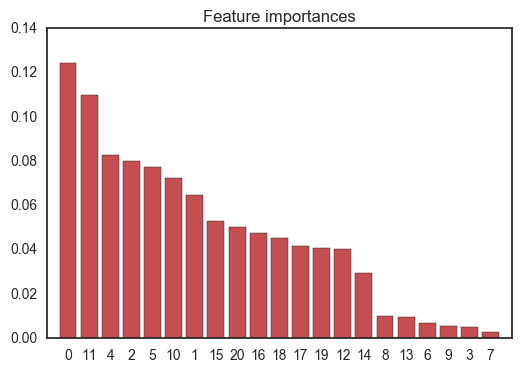

In [4]:
# display the importance of each feature
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_data.shape[1] - 1): # exclusing the y column
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1] - 1), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_data.shape[1] - 1), indices)
plt.xlim([-1, train_data.shape[1] - 1])
plt.show()

From the feature importance ranking we can see that the following features contribute about 95% importance:
Feature ranking:
1. feature 0 (0.124356)
2. feature 11 (0.109684)
3. feature 4 (0.082663)
4. feature 2 (0.079965)
5. feature 5 (0.077523)
6. feature 10 (0.072318)
7. feature 1 (0.064707)
8. feature 15 (0.053032)
9. feature 20 (0.050440)
10. feature 16 (0.047699)
11. feature 18 (0.045063)
12. feature 17 (0.041520)
13. feature 19 (0.040616)
14. feature 12 (0.040527)
15. feature 14 (0.029509)
16. feature 8 (0.010230)
17. feature 13 (0.009679)
18. feature 6 (0.007035)
19. feature 9 (0.005565)
20. feature 3 (0.005050)
21. feature 7 (0.002820)

In [5]:
selected_features = []
for i in [0, 11, 4, 2, 5, 10, 1, 15, 20, 16, 18, 17, 19, 12, 14, 8, 13, 6, 9, 3, 7]:
    print "Feature index: ", i, "Feature Name: ", features[i]
    selected_features.append(features[i])
# select the important features and reconstruct the dataframe

data_selected = train_data[['TripType'] + selected_features]
data_selected[1:10]

Feature index:  0 Feature Name:  VisitNumber
Feature index:  11 Feature Name:  N_Upc
Feature index:  4 Feature Name:  DepartmentDescription
Feature index:  2 Feature Name:  Upc
Feature index:  5 Feature Name:  FinelineNumber
Feature index:  10 Feature Name:  N_Fineline
Feature index:  1 Feature Name:  Weekday
Feature index:  15 Feature Name:  Mean_Count
Feature index:  20 Feature Name:  max_to_mean
Feature index:  16 Feature Name:  Range
Feature index:  18 Feature Name:  Ratio_U_D
Feature index:  17 Feature Name:  Ratio_F_D
Feature index:  19 Feature Name:  mean_to_min
Feature index:  12 Feature Name:  N_Dep
Feature index:  14 Feature Name:  Max_Count
Feature index:  8 Feature Name:  ScanCount_Neg
Feature index:  13 Feature Name:  Min_Count
Feature index:  6 Feature Name:  Count
Feature index:  9 Feature Name:  FinelineNumber_Missing
Feature index:  3 Feature Name:  ScanCount
Feature index:  7 Feature Name:  Count_Null


,TripType,VisitNumber,N_Upc,DepartmentDescription,Upc,FinelineNumber,N_Fineline,Weekday,Mean_Count,max_to_mean,...,Ratio_F_D,mean_to_min,N_Dep,Max_Count,ScanCount_Neg,Min_Count,Count,FinelineNumber_Missing,ScanCount,Count_Null
1,30,7,2,62,6.053882e+10,8931.0,2,0,1.0,1.0,...,1.000000,1.0,2,1,0.0,1,1,0.0,1,0.0
2,30,7,2,50,7.410811e+09,4504.0,2,0,1.0,1.0,...,1.000000,1.0,2,1,0.0,1,1,0.0,1,0.0
3,26,8,21,49,2.238404e+09,3565.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,2,1.0,2,0.0
4,26,8,21,49,2.006614e+09,1017.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,2,1.0,2,0.0
5,26,8,21,49,2.006619e+09,1017.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,2,1.0,2,0.0
6,26,8,21,49,2.006614e+09,1017.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,1,1.0,1,0.0
7,26,8,21,49,7.004803e+09,2802.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,1,1.0,1,0.0
8,26,8,21,49,2.238495e+09,4501.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,1,1.0,1,0.0
9,26,8,21,49,2.238400e+09,3565.0,17,0,4.0,4.5,...,2.428571,4.0,7,18,1.0,1,0,1.0,-1,0.0


2. Model Selection

In [5]:
# xgboost
import xgboost as xgb
import numpy as np
#from sklearn.model_selection import KFold
import sklearn

In [ ]:
train = data_selected.ix[:, data_selected.columns != 'TripType']
target = data_selected['TripType']

# label need to be 0 to num_class -1, so relabel all the target values to 1...class - 1
target_reindexed = np.arange(0,len(set(target)))
target_indexmap = {}
trip = list(set(target))
for i in target_reindexed:
    target_indexmap[trip[i]] = i
# reindex the target to the new index
target_new = []
for row in target:
    target_new.append(target_indexmap[row])
target_new = pd.DataFrame(target_new)           

In [8]:
# 调参
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = len(set(target))
num_round = 5
# evallist  = [(dtest,'eval'), (dtrain,'train')]

In [ ]:
# cross validation, 5 folder to have the test data set label
kf = sklearn.model_selection.KFold(5)
accuracy = 0
n = 1
for train_fold, test_fold in kf.split(train):
    #print type(train_fold), numpy array
    X_train, X_test, y_train, y_test = train.loc[train_fold], train.loc[test_fold], target_new.loc[train_fold], target_new.loc[test_fold]
    
    xgtrain = xgb.DMatrix(X_train.values, y_train.values)
    xgtest = xgb.DMatrix(X_test.values, y_test.values)
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    bst = xgb.train( param, xgtrain, num_round, watchlist)
    # get prediction
    pred = bst.predict( xgtest );
    bst.save_model( 'xgboost' + str(n) + '.model')
    accuracy += sum( int(pred[i]) != y_test.loc[i].values[0] for i in range(len(y_test))) / float(len(y_test)) 
    print ('predicting, classification error=%f' % (sum( int(pred[i]) != y_test.loc[i].values[0] for i in range(len(y_test))) / float(len(y_test)) ))
    n += 1
print ("The accuracy of prediction for xgboost is ", accuracy)




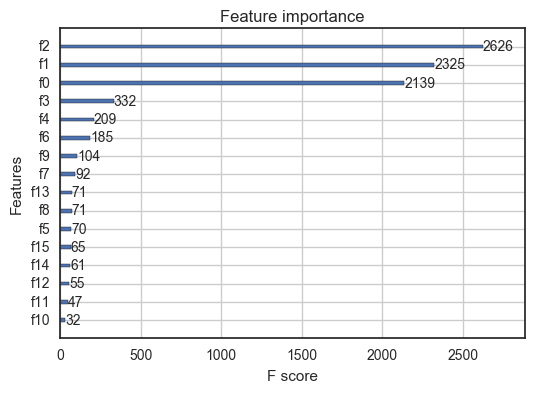

In [34]:
# load the results from xgboost 

bst = xgb.Booster({'nthread':4}) #init model
bst.load_model("xgboost1.model") # load data

# feature importance from this model 
xgb.plot_importance(bst)




In [37]:
xgboost_features = [2,1,0,3,4,6,9,7,13,8,5,15,14,12,11,10]
xgboost_selectedFeatures = []
for i in xgboost_features:
    print "Feature name: ", selected_features[i]
    xgboost_selectedFeatures.append(selected_features[i])


 Feature name:  FinelineNumber
Feature name:  Upc
Feature name:  VisitNumber
Feature name:  ScanCount
Feature name:  GROCERY DRY GOODS
Feature name:  PRODUCE
Feature name:  Saturday
Feature name:  Sunday
Feature name:  Thursday
Feature name:  MENS WEAR
Feature name:  FINANCIAL SERVICES
Feature name:  Wednesday
Feature name:  Tuesday
Feature name:  Monday
Feature name:  Friday
Feature name:  INFANT CONSUMABLE HARDLINES


deep learning neural network model

In [ ]:
'''
import os
print(os.path.expanduser('~'))
To find the keras.jason file and change the backened option to theano
'''
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

This is important to ensure that the results we achieve from this model can be achieved again precisely. It ensures that the stochastic process of training a neural network model can be reproduced.

In [8]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

number of layer equal to number of categorical output in y

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [ ]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Logistic regression 

In [15]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
kf = sklearn.model_selection.KFold(5)
accuracy = 0
n = 1

logreg = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=5, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None,
                            solver='lbfgs', max_iter=200, multi_class='multinomial', verbose=0) 

for train_fold, test_fold in kf.split(train):
    #print type(train_fold), numpy array
    X_train, X_test, y_train, y_test = train.loc[train_fold], train.loc[test_fold], target_new.loc[train_fold], target_new.loc[test_fold]
    
    xgtrain = xgb.DMatrix(X_train.values, y_train.values)
    xgtest = xgb.DMatrix(X_test.values, y_test.values)
    #watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    logreg.fit(X_train.values, y_train.values)
    # get prediction
    z= logreg.score(X_test.values, y_test.values)
    print ('predicting, classification error=%f' % z )
    accuracy += z
    n += 1
accuracy = accuracy/n
print ("The accuracy of prediction for xgboost is ", accuracy)


4.Adaboost classifier

In [12]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

# filter out the -99990 items in the data
train_data = train_data[train_data.Upc != -99990]
X = train_data[[ f for f in train_data.columns if f != 'TripType' ]]
Y = train_data['TripType']
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=5, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.438248629311
